# Exploratory Data Analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import jinja2

In [2]:
df = pd.read_csv('Data/cleaned_data.csv')

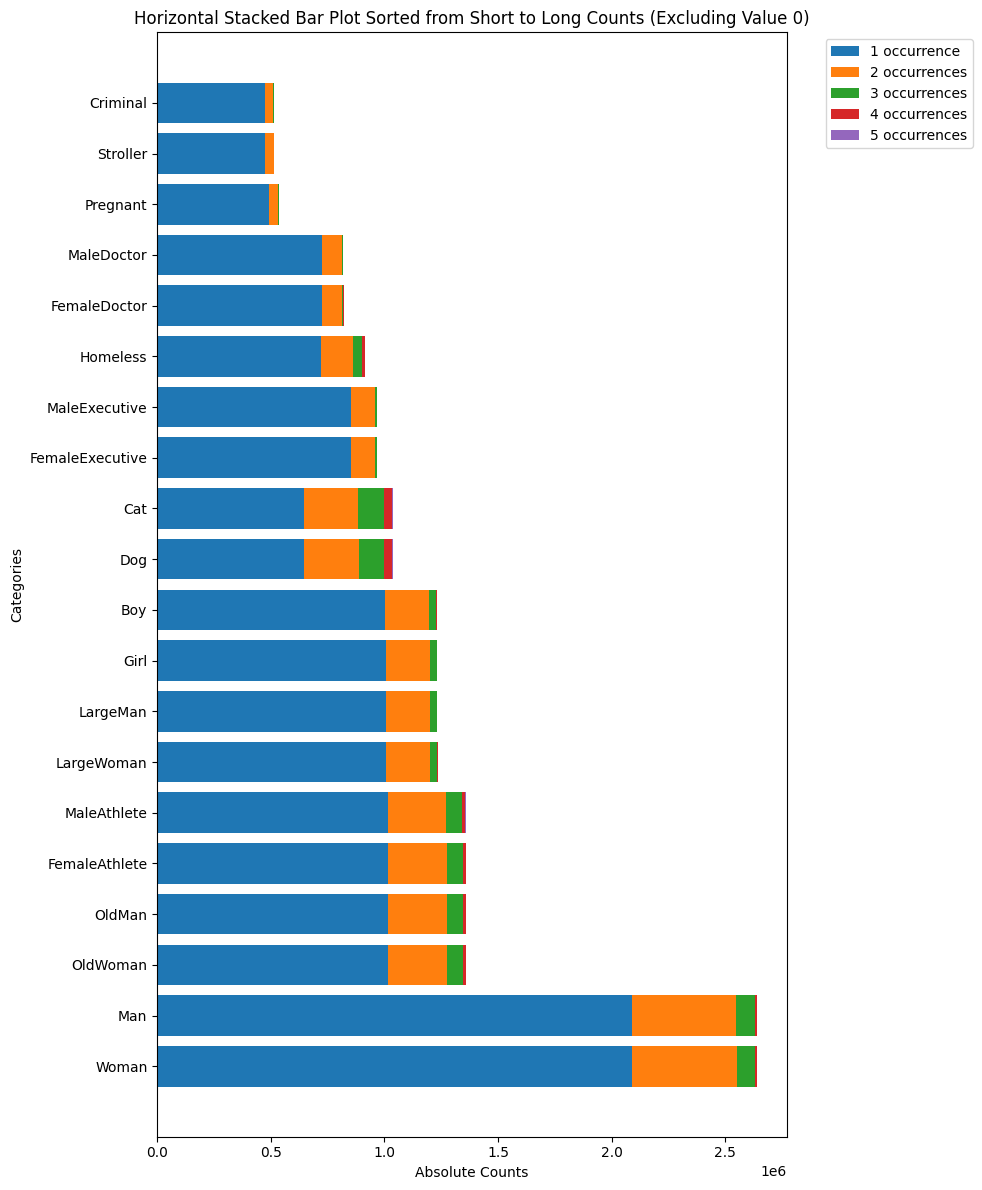

In [31]:
# List of columns to plot
columns = ['Man', 'Woman', 'Pregnant', 'Stroller', 'OldMan', 'OldWoman', 'Boy', 'Girl',
           'Homeless', 'LargeWoman', 'LargeMan', 'Criminal', 'MaleExecutive', 'FemaleExecutive',
           'FemaleAthlete', 'MaleAthlete', 'FemaleDoctor', 'MaleDoctor', 'Dog', 'Cat']

# Create a dictionary to store the counts for each value (1 to 5)
value_counts = {val: [] for val in range(1, 6)}

# Calculate the counts of each value (1 to 5) for each column
for col in columns:
    for val in range(1, 6):
        count = (df[col] == val).sum()  # Count how many times 'val' appears in the column
        value_counts[val].append(count)  # Store the absolute count

# Calculate total counts for sorting (sum of counts for values 1 to 5)
total_counts = [sum(value_counts[val][i] for val in range(1, 6)) for i in range(len(columns))]

# Sort columns and value_counts by total_counts
sorted_indices = sorted(range(len(columns)), key=lambda i: total_counts[i])

# Apply sorting to columns and value_counts
sorted_columns = [columns[i] for i in sorted_indices]
sorted_value_counts = {val: [value_counts[val][i] for i in sorted_indices] for val in range(1, 6)}

# Reverse the order to go from short to long
sorted_columns.reverse()
sorted_value_counts = {val: sorted_value_counts[val][::-1] for val in range(1, 6)}

# Create the horizontal stacked bar plot
bar_width = 0.8
fig, ax = plt.subplots(figsize=(10, 12))

# Bottom initialization for stacking
bottom = [0] * len(sorted_columns)

# Add each segment (for values 1 to 5) to the horizontal bar plot
for val in range(1, 6):
    occurrence_label = 'occurrence' if val == 1 else 'occurrences'  # Set label based on value
    ax.barh(sorted_columns, sorted_value_counts[val], bar_width, label=f'{val} {occurrence_label}', left=bottom)
    
    bottom = [i + j for i, j in zip(bottom, sorted_value_counts[val])]  # Update bottom for stacking

# Add labels and title
ax.set_xlabel('Absolute Counts')
ax.set_ylabel('Categories')
ax.set_title('Horizontal Stacked Bar Plot Sorted from Short to Long Counts (Excluding Value 0)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')  # Place legend outside
plt.tight_layout()

# Show the plot
plt.show()

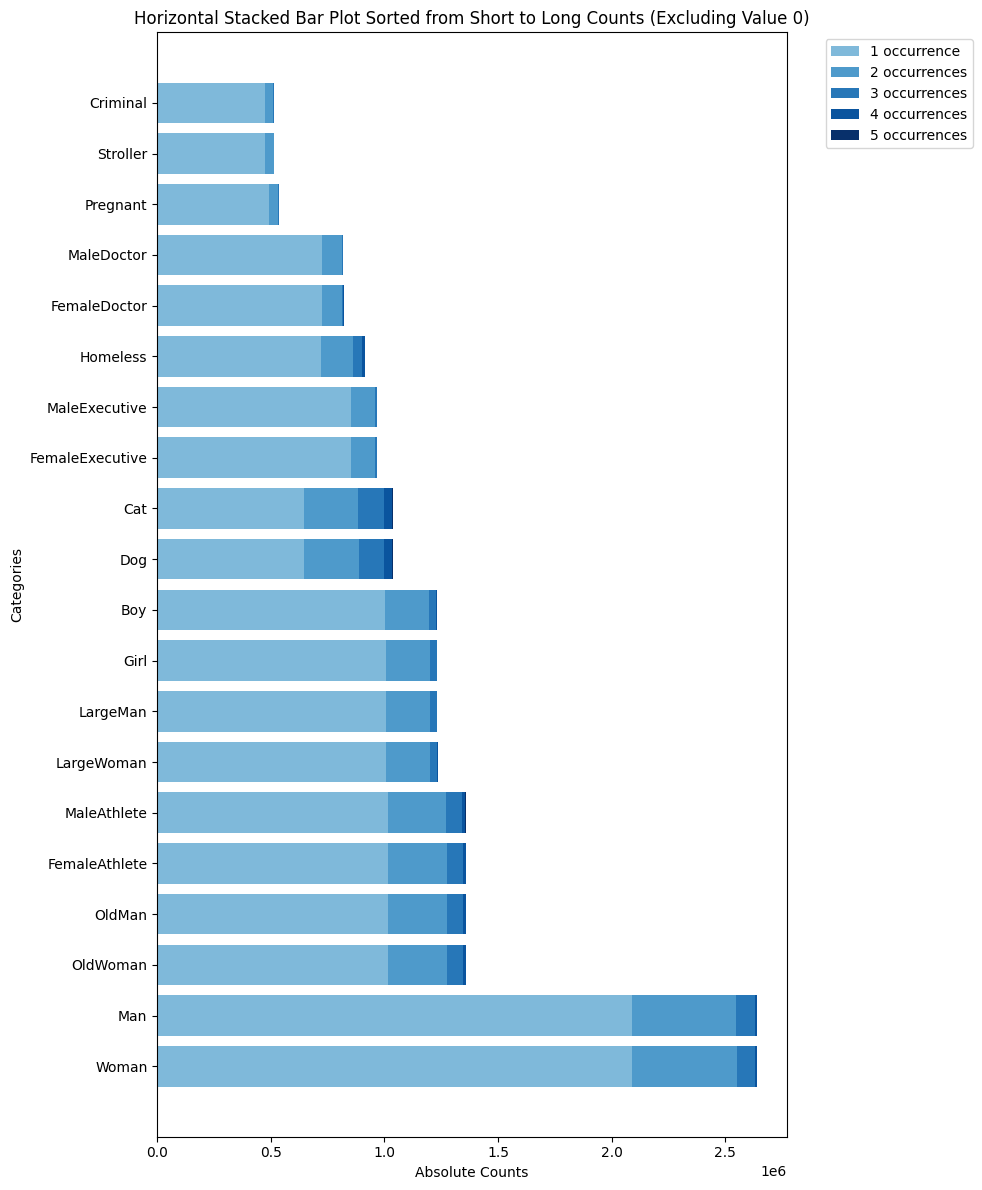

In [46]:
import matplotlib.pyplot as plt
import numpy as np

# List of columns to plot
columns = ['Man', 'Woman', 'Pregnant', 'Stroller', 'OldMan', 'OldWoman', 'Boy', 'Girl',
           'Homeless', 'LargeWoman', 'LargeMan', 'Criminal', 'MaleExecutive', 'FemaleExecutive',
           'FemaleAthlete', 'MaleAthlete', 'FemaleDoctor', 'MaleDoctor', 'Dog', 'Cat']

# Create a dictionary to store the counts for each value (1 to 5)
value_counts = {val: [] for val in range(1, 6)}

# Calculate the counts of each value (1 to 5) for each column
for col in columns:
    for val in range(1, 6):
        count = (df[col] == val).sum()  # Count how many times 'val' appears in the column
        value_counts[val].append(count)  # Store the absolute count

# Calculate total counts for sorting (sum of counts for values 1 to 5)
total_counts = [sum(value_counts[val][i] for val in range(1, 6)) for i in range(len(columns))]

# Sort columns and value_counts by total_counts
sorted_indices = sorted(range(len(columns)), key=lambda i: total_counts[i])

# Apply sorting to columns and value_counts
sorted_columns = [columns[i] for i in sorted_indices]
sorted_value_counts = {val: [value_counts[val][i] for i in sorted_indices] for val in range(1, 6)}

# Reverse the order to go from short to long
sorted_columns.reverse()
sorted_value_counts = {val: sorted_value_counts[val][::-1] for val in range(1, 6)}

# Create the horizontal stacked bar plot
bar_width = 0.8
fig, ax = plt.subplots(figsize=(10, 12))

# Bottom initialization for stacking
bottom = [0] * len(sorted_columns)

# Define the color gradient
colors = plt.cm.Blues(np.linspace(0.45, 1, 5))  

# Add each segment (for values 1 to 5) to the horizontal bar plot
for val in range(1, 6):
    occurrence_label = 'occurrence' if val == 1 else 'occurrences'  # Set label based on value
    ax.barh(sorted_columns, sorted_value_counts[val], bar_width,
            label=f'{val} {occurrence_label}', left=bottom, color=colors[val - 1])
    
    bottom = [i + j for i, j in zip(bottom, sorted_value_counts[val])]  # Update bottom for stacking

# Add labels and title
ax.set_xlabel('Absolute Counts')
ax.set_ylabel('Categories')
ax.set_title('Horizontal Stacked Bar Plot Sorted from Short to Long Counts (Excluding Value 0)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')  # Place legend outside
plt.tight_layout()

# Show the plot
plt.show()

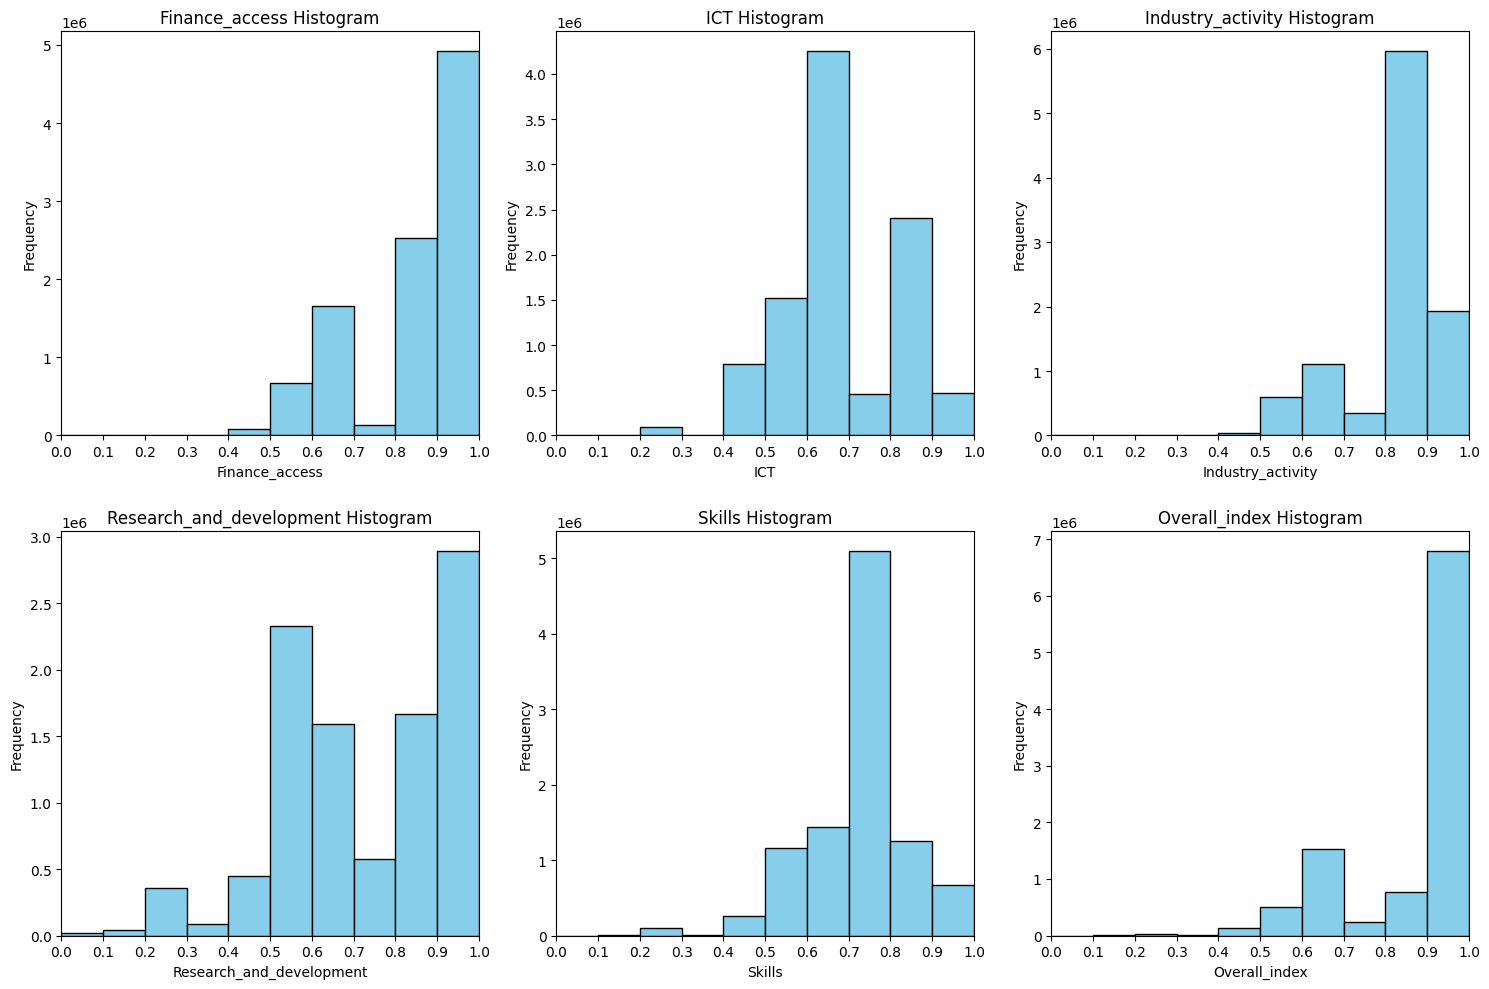

In [40]:
# Plotting histograms
fig, axs = plt.subplots(2, 3, figsize=(15, 10))

# Flatten the axs array for easier iteration
axs = axs.ravel()

# List of columns to plot
columns = ['Finance_access', 'ICT', 'Industry_activity', 'Research_and_development', 'Skills', 'Overall_index']

# Define the number of bins and the ticks
num_bins = 10
ticks = np.linspace(0, 1, num_bins + 1)  # Creates 11 ticks (0.0 to 1.0)

# Plot each column as a histogram
for i, col in enumerate(columns):
    axs[i].hist(df[col], bins=ticks, color='skyblue', edgecolor='black')  # Use defined ticks as bins
    axs[i].set_title(f'{col} Histogram')
    axs[i].set_xlabel(col)
    axs[i].set_ylabel('Frequency')
    axs[i].set_xlim(0, 1)  # Set x-axis limits
    axs[i].set_xticks(ticks)  # Set ticks to match the bins

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()


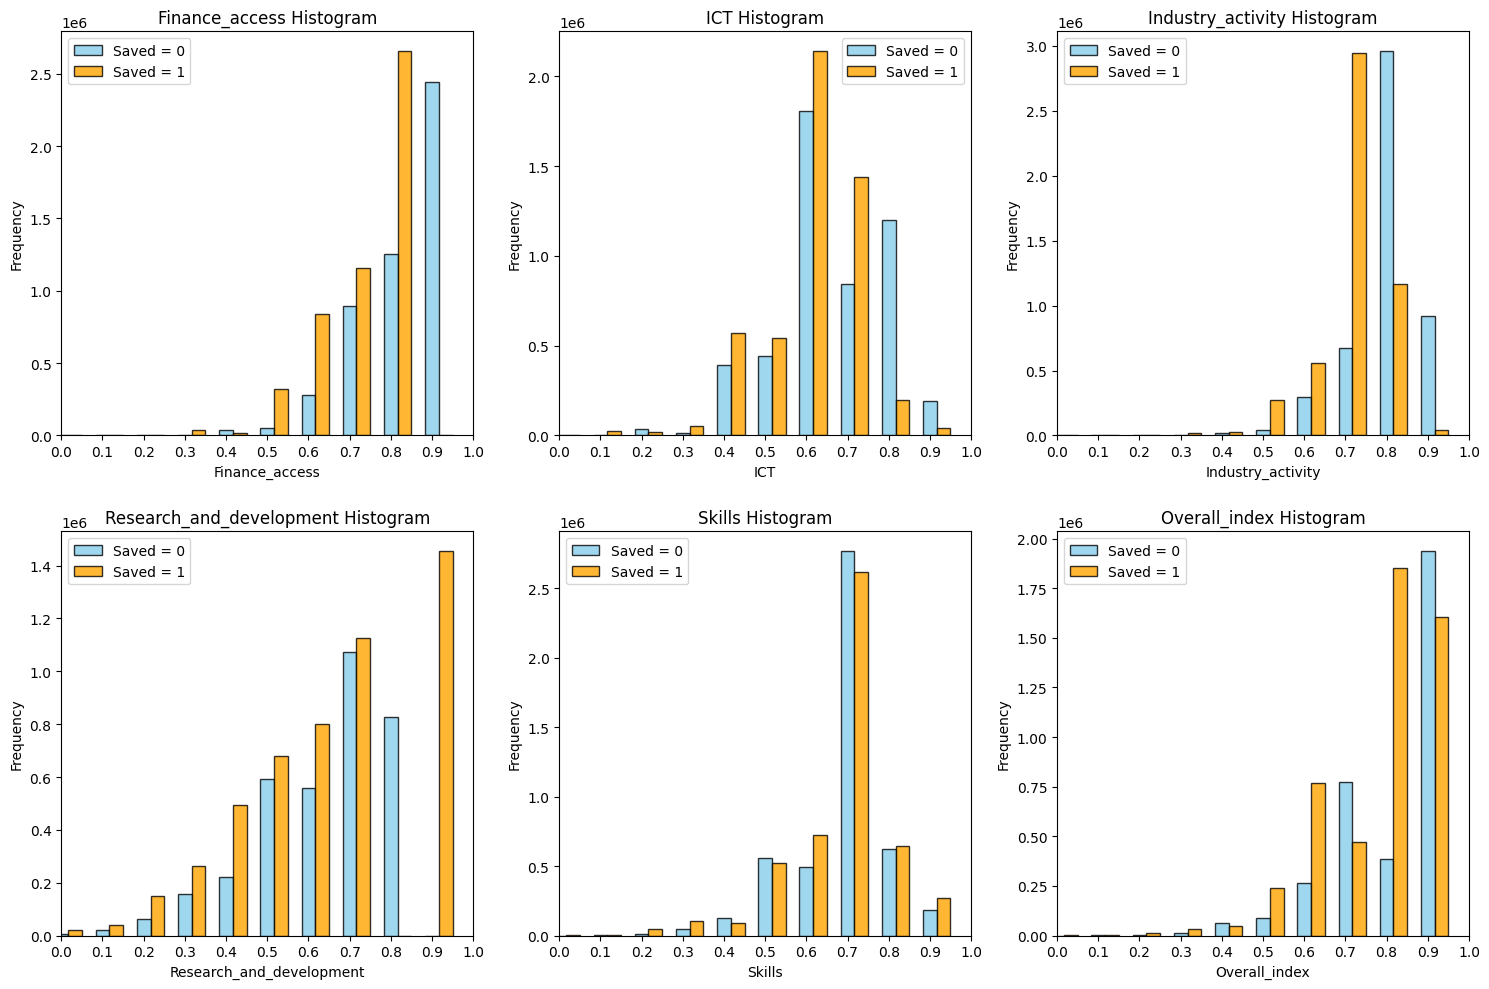

In [58]:
# Plotting histograms side by side
fig, axs = plt.subplots(2, 3, figsize=(15, 10))

# Flatten the axs array for easier iteration
axs = axs.ravel()

# List of columns to plot
columns = ['Finance_access', 'ICT', 'Industry_activity', 'Research_and_development', 'Skills', 'Overall_index']

# Define the number of bins and the ticks
num_bins = 10
ticks = np.linspace(0, 1, num_bins + 1)  # Creates 11 ticks (0.0 to 1.0)

# Width for side-by-side bars
width = (ticks[1] - ticks[0]) / 3

# Plot each column as a histogram for both classes (Saved = 0 and Saved = 1)
for i, col in enumerate(columns):
    axs[i].hist(df[df['Saved'] == 0][col], bins=ticks - width/2, alpha=0.8, color='skyblue', edgecolor='black', width=width, label='Saved = 0')
    axs[i].hist(df[df['Saved'] == 1][col], bins=ticks + width/2, alpha=0.8, color='orange', edgecolor='black', width=width, label='Saved = 1')
    axs[i].set_title(f'{col} Histogram')
    axs[i].set_xlabel(col)
    axs[i].set_ylabel('Frequency')
    axs[i].set_xlim(0, 1)  # Set x-axis limits
    axs[i].set_xticks(ticks)  # Set ticks to match the bins
    axs[i].legend()  # Add a legend to distinguish the two classes

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()

In [ ]:
# Count the occurrences of 0's and 1's for each binary variable
counts = df.apply(pd.Series.value_counts).fillna(0).astype(int)

# Convert counts DataFrame to LaTeX format
latex_table = counts.to_latex(header=True, index=True)

# Print the LaTeX table code
print(latex_table)


## Basic Statistics

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999977 entries, 0 to 9999976
Data columns (total 42 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   ResponseID                object 
 1   ExtendedSessionID         object 
 2   UserID                    float64
 3   PedPed                    int64  
 4   Barrier                   int64  
 5   CrossingSignal            int64  
 6   AttributeLevel            object 
 7   ScenarioTypeStrict        object 
 8   NumberOfCharacters        int64  
 9   DiffNumberOFCharacters    int64  
 10  Saved                     int64  
 11  Man                       int64  
 12  Woman                     int64  
 13  Pregnant                  int64  
 14  Stroller                  int64  
 15  OldMan                    int64  
 16  OldWoman                  int64  
 17  Boy                       int64  
 18  Girl                      int64  
 19  Homeless                  int64  
 20  LargeWoman              

In [4]:
pd.set_option('display.max_columns', None)
df.head(10)

,ResponseID,ExtendedSessionID,UserID,PedPed,Barrier,CrossingSignal,AttributeLevel,ScenarioTypeStrict,NumberOfCharacters,DiffNumberOFCharacters,Saved,Man,Woman,Pregnant,Stroller,OldMan,OldWoman,Boy,Girl,Homeless,LargeWoman,LargeMan,Criminal,MaleExecutive,FemaleExecutive,FemaleAthlete,MaleAthlete,FemaleDoctor,MaleDoctor,Dog,Cat,Finance_access,ICT,Industry_activity,Overall_index,Research_and_development,Skills,Total,Males,Females,Passengers,Pedestrians
0,2223Xu54ufgjcyMR3,1425316635_327833569077076.0,3.278336e+14,0,1,0,Old,Age,5,0,0,0,0,0,0,2,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.6,0.55,0.8,0.6,0.50,0.40,13.60,22.05,5.45,2.5024,3.8760
1,2223jMWDEGNeszivb,-1683127088_785070916172117.0,7.850709e+14,1,0,2,More,Utilitarian,5,2,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,1,0,0,0,1,0,0.9,0.65,0.9,0.9,0.70,0.80,2.90,4.20,1.60,0.5076,0.6237
2,2224YxTZcu4sJqTSD,-887960483_174929057557052.0,1.749291e+14,0,0,2,Hoomans,Species,5,0,1,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0.9,0.80,0.8,0.9,0.70,0.75,5.80,8.15,3.45,3.7294,0.8816
3,2225gNWJcAeE92LXd,2069688900_9887644874714294.0,9.887645e+15,0,1,0,More,Utilitarian,5,4,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0.8,0.80,0.9,0.9,0.80,0.75,4.20,6.35,2.15,1.9120,0.6120
4,2229A3nHWnXQBFMf5,-835212059_2515956109.0,2.515956e+09,0,1,0,Fat,Fitness,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.8,0.60,0.8,0.8,0.70,0.65,5.70,9.15,2.45,2.3540,0.9680
5,222Bih22xMQR5brhF,-841718081_3084184331213722.0,3.084184e+15,0,0,2,Pets,Species,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.7,0.45,0.7,0.7,0.60,0.55,20.35,33.90,7.15,4.6168,3.6019
6,222EMA6HfuH3epQAR,-1777681375_4278593194428872.0,4.278593e+15,0,0,2,Less,Random,2,3,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0.6,0.40,0.7,0.4,0.30,0.30,12.20,18.90,5.45,0.5929,1.8755
7,222EML9RReYSmaG6R,-722961631_3464412713.0,3.464413e+09,0,1,0,Fit,Fitness,5,0,1,0,2,0,0,0,0,0,0,0,0,0,0,0,0,2,1,0,0,0,0,0.9,0.65,0.8,1.0,1.00,0.75,12.50,17.85,7.25,3.9603,1.9737
8,222ExJyBWw92ii95N,610674727_4967821486078208.0,4.967821e+15,1,0,0,Fit,Fitness,5,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,3,1,0,0,0,0,0.7,0.90,0.8,0.9,0.60,0.95,6.25,9.40,3.20,3.3118,0.7076
9,222GF5n25wm2sB4TK,1073329312_1329715248,1.329715e+09,0,1,0,Hoomans,Species,4,0,1,1,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0.9,0.80,0.8,0.9,0.75,0.85,2.95,4.60,1.45,1.1550,0.7110


In [8]:
describe = df.describe()
df_describe = pd.DataFrame(describe)
df_describe

,UserID,PedPed,Barrier,CrossingSignal,NumberOfCharacters,DiffNumberOFCharacters,Saved,Man,Woman,Pregnant,Stroller,OldMan,OldWoman,Boy,Girl,Homeless,LargeWoman,LargeMan,Criminal,MaleExecutive,FemaleExecutive,FemaleAthlete,MaleAthlete,FemaleDoctor,MaleDoctor,Dog,Cat,Finance_access,ICT,Industry_activity,Overall_index,Research_and_development,Skills,Total,Males,Females,Passengers,Pedestrians
count,9.999977e+06,9.999977e+06,9.999977e+06,9.999977e+06,9.999977e+06,9.999977e+06,9.999977e+06,9.999977e+06,9.999977e+06,9.999977e+06,9.999977e+06,9.999977e+06,9.999977e+06,9.999977e+06,9.999977e+06,9.999977e+06,9.999977e+06,9.999977e+06,9.999977e+06,9.999977e+06,9.999977e+06,9.999977e+06,9.999977e+06,9.999977e+06,9.999977e+06,9.999977e+06,9.999977e+06,9.999977e+06,9.999977e+06,9.999977e+06,9.999977e+06,9.999977e+06,9.999977e+06,9.999977e+06,9.999977e+06,9.999977e+06,9.999977e+06,9.999977e+06
mean,2.983251e+15,4.525884e-01,2.735973e-01,6.064516e-01,2.991938e+00,5.308132e-01,5.034359e-01,3.290837e-01,3.291663e-01,5.771053e-02,5.551153e-02,1.799933e-01,1.801066e-01,1.498963e-01,1.499531e-01,1.178879e-01,1.500995e-01,1.499564e-01,5.536443e-02,1.090113e-01,1.091178e-01,1.799475e-01,1.799471e-01,9.211291e-02,9.208441e-02,1.625390e-01,1.624485e-01,8.165584e-01,6.749492e-01,7.946740e-01,8.637247e-01,7.368676e-01,7.267105e-01,9.048548e+00,1.368583e+01,4.557186e+00,3.267524e+00,1.655497e+00
std,3.313796e+15,4.977471e-01,4.458047e-01,8.148713e-01,1.476202e+00,1.116918e+00,4.999882e-01,6.112378e-01,6.112281e-01,2.515219e-01,2.470397e-01,5.093771e-01,5.094068e-01,4.351471e-01,4.349701e-01,4.180970e-01,4.352561e-01,4.350373e-01,2.467218e-01,3.518990e-01,3.519917e-01,5.090938e-01,5.093950e-01,3.247873e-01,3.248174e-01,5.504186e-01,5.506728e-01,1.036159e-01,1.251280e-01,8.399461e-02,1.371796e-01,2.142508e-01,1.229714e-01,5.080295e+00,8.121423e+00,2.368545e+00,1.573126e+00,1.097749e+00
min,1.882500e+04,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e-01,5.000000e-02,2.500000e-01,5.000000e-02,0.000000e+00,0.000000e+00,1.750000e+00,2.300000e+00,9.000000e-01,0.000000e+00,1.220000e-01
25%,2.672236e+09,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,7.500000e-01,6.500000e-01,8.000000e-01,8.000000e-01,6.000000e-01,7.000000e-01,4.900000e+00,7.500000e+00,2.450000e+00,1.990900e+00,7.840000e-01
50%,1.621435e+15,0.000000e+00,0.000000e+00,0.000000e+00,3.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,8.500000e-01,6.500000e-01,8.000000e-01,9.000000e-01,7.500000e-01,7.500000e-01,7.800000e+00,1.240000e+01,3.600000e+00,3.574200e+00,1.435000e+00
75%,5.806409e+15,1.000000e+00,1.000000e+00,1.000000e+00,4.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,9.000000e-01,8.000000e-01,8.000000e-01,1.000000e+00,1.000000e+00,7.500000e-01,1.250000e+01,1.785000e+01,7.250000e+00,3.960300e+00,1.973700e+00
max,9.999993e+15,1.000000e+00,1.000000e+00,2.000000e+00,5.000000e+00,4.000000e+00,1.000000e+00,5.000000e+00,5.000000e+00

In [12]:
latex_table = df_describe.to_latex(index=True, float_format="%.2f")  # Adjust float_format as needed
with open('summary_table.tex', 'w') as f:
    f.write(latex_table)

## Data Distribution

## Categorical Data Analysis

In [48]:
# Create the countplot
plt.figure(figsize=(10, 6))  # Set the figure size
sns.countplot(data=df, x='ScenarioTypeStrict')
plt.xticks(rotation=45)
plt.title('Count of Scenarios by Type')  # Add a title
plt.xlabel('Scenario Type')  # Add x-axis label
plt.ylabel('Count')  # Add y-axis label

# Save the figure
plt.tight_layout()  # Adjust layout
plt.savefig('countplot_scenario_type.pdf')  # Save as a PDF
plt.close()  # Close the figure to avoid display

In [49]:
# Create the countplot
plt.figure(figsize=(10, 6))  # Set the figure size
sns.countplot(data=df, x='AttributeLevel')
plt.xticks(rotation=45)
plt.title('Count of Scenarios by Attribute')  # Add a title
plt.xlabel('Attribute Type')  # Add x-axis label
plt.ylabel('Count')  # Add y-axis label

# Save the figure
plt.tight_layout()  # Adjust layout
plt.savefig('countplot_attribute_type.pdf')  # Save as a PDF
plt.close()  # Close the figure to avoid display

## Correlation

In [ ]:
# Correlation matrix
correlation_matrix = df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.show()


## Interaction effect

In [ ]:
# We already have df based on your provided data
# Extract the relevant columns: 'NumberOfLivesSaved', 'Overall_index', and 'Saved'
utilitarian_subset = pd.read_csv('Data/utilitarian_subset.csv')

df = utilitarian_subset[['NumberOfLivesSaved', 'Overall_index', 'Saved']]

# Create a pivot table to aggregate and prepare data for the heatmap
# We bin 'Overall_index' to create discrete intervals for visualization purposes
pivot_table = df.pivot_table(
    values='Saved', 
    index=pd.cut(df['Overall_index'], bins=np.linspace(0, 1, 6)),  # Y-axis: Bins of 'Overall_index'
    columns='NumberOfLivesSaved',  # X-axis: 'NumberOfLivesSaved'
    aggfunc='mean'  # Compute mean to represent proportion of 'Saved' values
)

# Sort the pivot table index to be in descending order (high to low)
pivot_table = pivot_table.sort_index(ascending=False)

# Plotting the heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(pivot_table, annot=True, cmap='coolwarm', cbar_kws={'label': 'Proportion of Saved'})
plt.title('Heatmap of Overall_index vs. NumberOfLivesSaved and Proportion of Saved')
plt.xlabel('NumberOfLivesSaved')
plt.ylabel('Overall_index')
plt.show()